# 1. Dataset description

In [1]:
# Import libraries and Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# Loading Data-Set
label = pd.read_csv("/content/drive/MyDrive/Machine Learning/Semiconductor yield analysis and prediction/secom_labels.txt", delim_whitespace=True, header=None)
features = pd.read_csv("/content/drive/MyDrive/Machine Learning/Semiconductor yield analysis and prediction/secom_data.txt", delim_whitespace=True,header=None)

In [3]:
features = features.rename(columns={features.columns[i]: 'F'+ str(i) for i in range (590)}) # adding name to feature columns
label = label.rename(columns={0: 'L0', 1 :'date'})   # adding name to label column

In [4]:
label

,L0,date
0,-1,19/07/2008 11:55:00
1,-1,19/07/2008 12:32:00
2,1,19/07/2008 13:17:00
3,-1,19/07/2008 14:43:00
4,-1,19/07/2008 15:22:00
...,...,...
1562,-1,16/10/2008 15:13:00
1563,-1,16/10/2008 20:49:00
1564,-1,17/10/2008 05:26:00
1565,-1,17/10/2008 06:01:00


In [5]:
# Concatinating to separate files
df = pd.concat([features,label],axis=1, ignore_index=False)

In [6]:
df.shape

(1567, 592)

In [7]:
df=df.iloc[:,0:591]

In [8]:
print(df.head()) # Preliminary inspection of data-set

        F0       F1         F2         F3      F4     F5        F6      F7  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   97.6133  0.1242   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0  104.2367  0.1217   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   

       F8      F9  ...      F581    F582    F583    F584     F585    F586  \
0  1.5005  0.0162  ...       NaN  0.5005  0.0118  0.0035   2.3630     NaN   
1  1.4966 -0.0005  ...  208.2045  0.5019  0.0223  0.0055   4.4447  0.0096   
2  1.4436  0.0041  ...   82.8602  0.4958  0.0157  0.0039   3.1745  0.0584   
3  1.4882 -0.0124  ...   73.8432  0.4990  0.0103  0.0025   2.0544  0.0202   
4  1.5031 -0.0031  ...       NaN  0.4800  0.4766  0.1045  99.3032  0.0202   

     F587    F588      F589  L0  
0     NaN     NaN       NaN  -1  


In [9]:
print(df.shape) # Preliminary inspection of data-set
print(df.index) # Preliminary inspection of data-set

(1567, 591)
RangeIndex(start=0, stop=1567, step=1)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 591 entries, F0 to L0
dtypes: float64(590), int64(1)
memory usage: 7.1 MB


In [11]:
df.describe()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F581,F582,F583,F584,F585,F586,F587,F588,F589,L0
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [12]:
df.isna().sum() #chhecking for null values

,0
F0,6
F1,7
F2,14
F3,14
F4,14
...,...
F586,1
F587,1
F588,1
F589,1


In [13]:
# Dropping columns with more than 10% missing data
df = df.dropna(thresh=len(df) - int(0.1 * len(df)), axis=1)
#otherewise substite na values with median
df = df.fillna(df.median())

In [14]:
df.L0.replace(-1,0, inplace=True) # Converting label column to binary [0,1]

In [15]:
# Building label vectore (y) and feature matrix(X)
y = df['L0']
X = df.drop(['L0'], axis=1)

In [16]:
X.shape, y.shape

((1567, 538), (1567,))

# 2.Dimension reduction

In [17]:
# Employing Lasso regularization approach to reduce feature matrix dimenssion
lasso = Lasso(alpha=0.2)
lasso_coef = lasso.fit(X, y).coef_
print('Total number of remaining features:')
print(len(lasso_coef[lasso_coef!=0.0]))


Total number of remaining features:
41


In [18]:
# Making a list from selected features
val = lasso_coef[lasso_coef!=0.0]
key, = np.where(lasso_coef!=0.0)
feature_list = X.columns[key]
val_plt = np.multiply(val,1000)
feature_list = feature_list.tolist()
feature_column = key.tolist()
val = val.tolist()
print('List of selected features via Lasso dimenssion reduction:')
print(feature_list)


List of selected features via Lasso dimenssion reduction:
['F0', 'F1', 'F3', 'F21', 'F22', 'F23', 'F24', 'F59', 'F67', 'F88', 'F90', 'F137', 'F140', 'F159', 'F160', 'F161', 'F162', 'F188', 'F296', 'F297', 'F363', 'F418', 'F419', 'F423', 'F433', 'F468', 'F480', 'F482', 'F483', 'F484', 'F485', 'F486', 'F488', 'F489', 'F499', 'F500', 'F510', 'F511', 'F521', 'F572', 'F589']


In [19]:
# revising feature matrix based on LASSO features reduction
X = X[feature_list]

# 3.Exploratory Data Analysis(EDA)

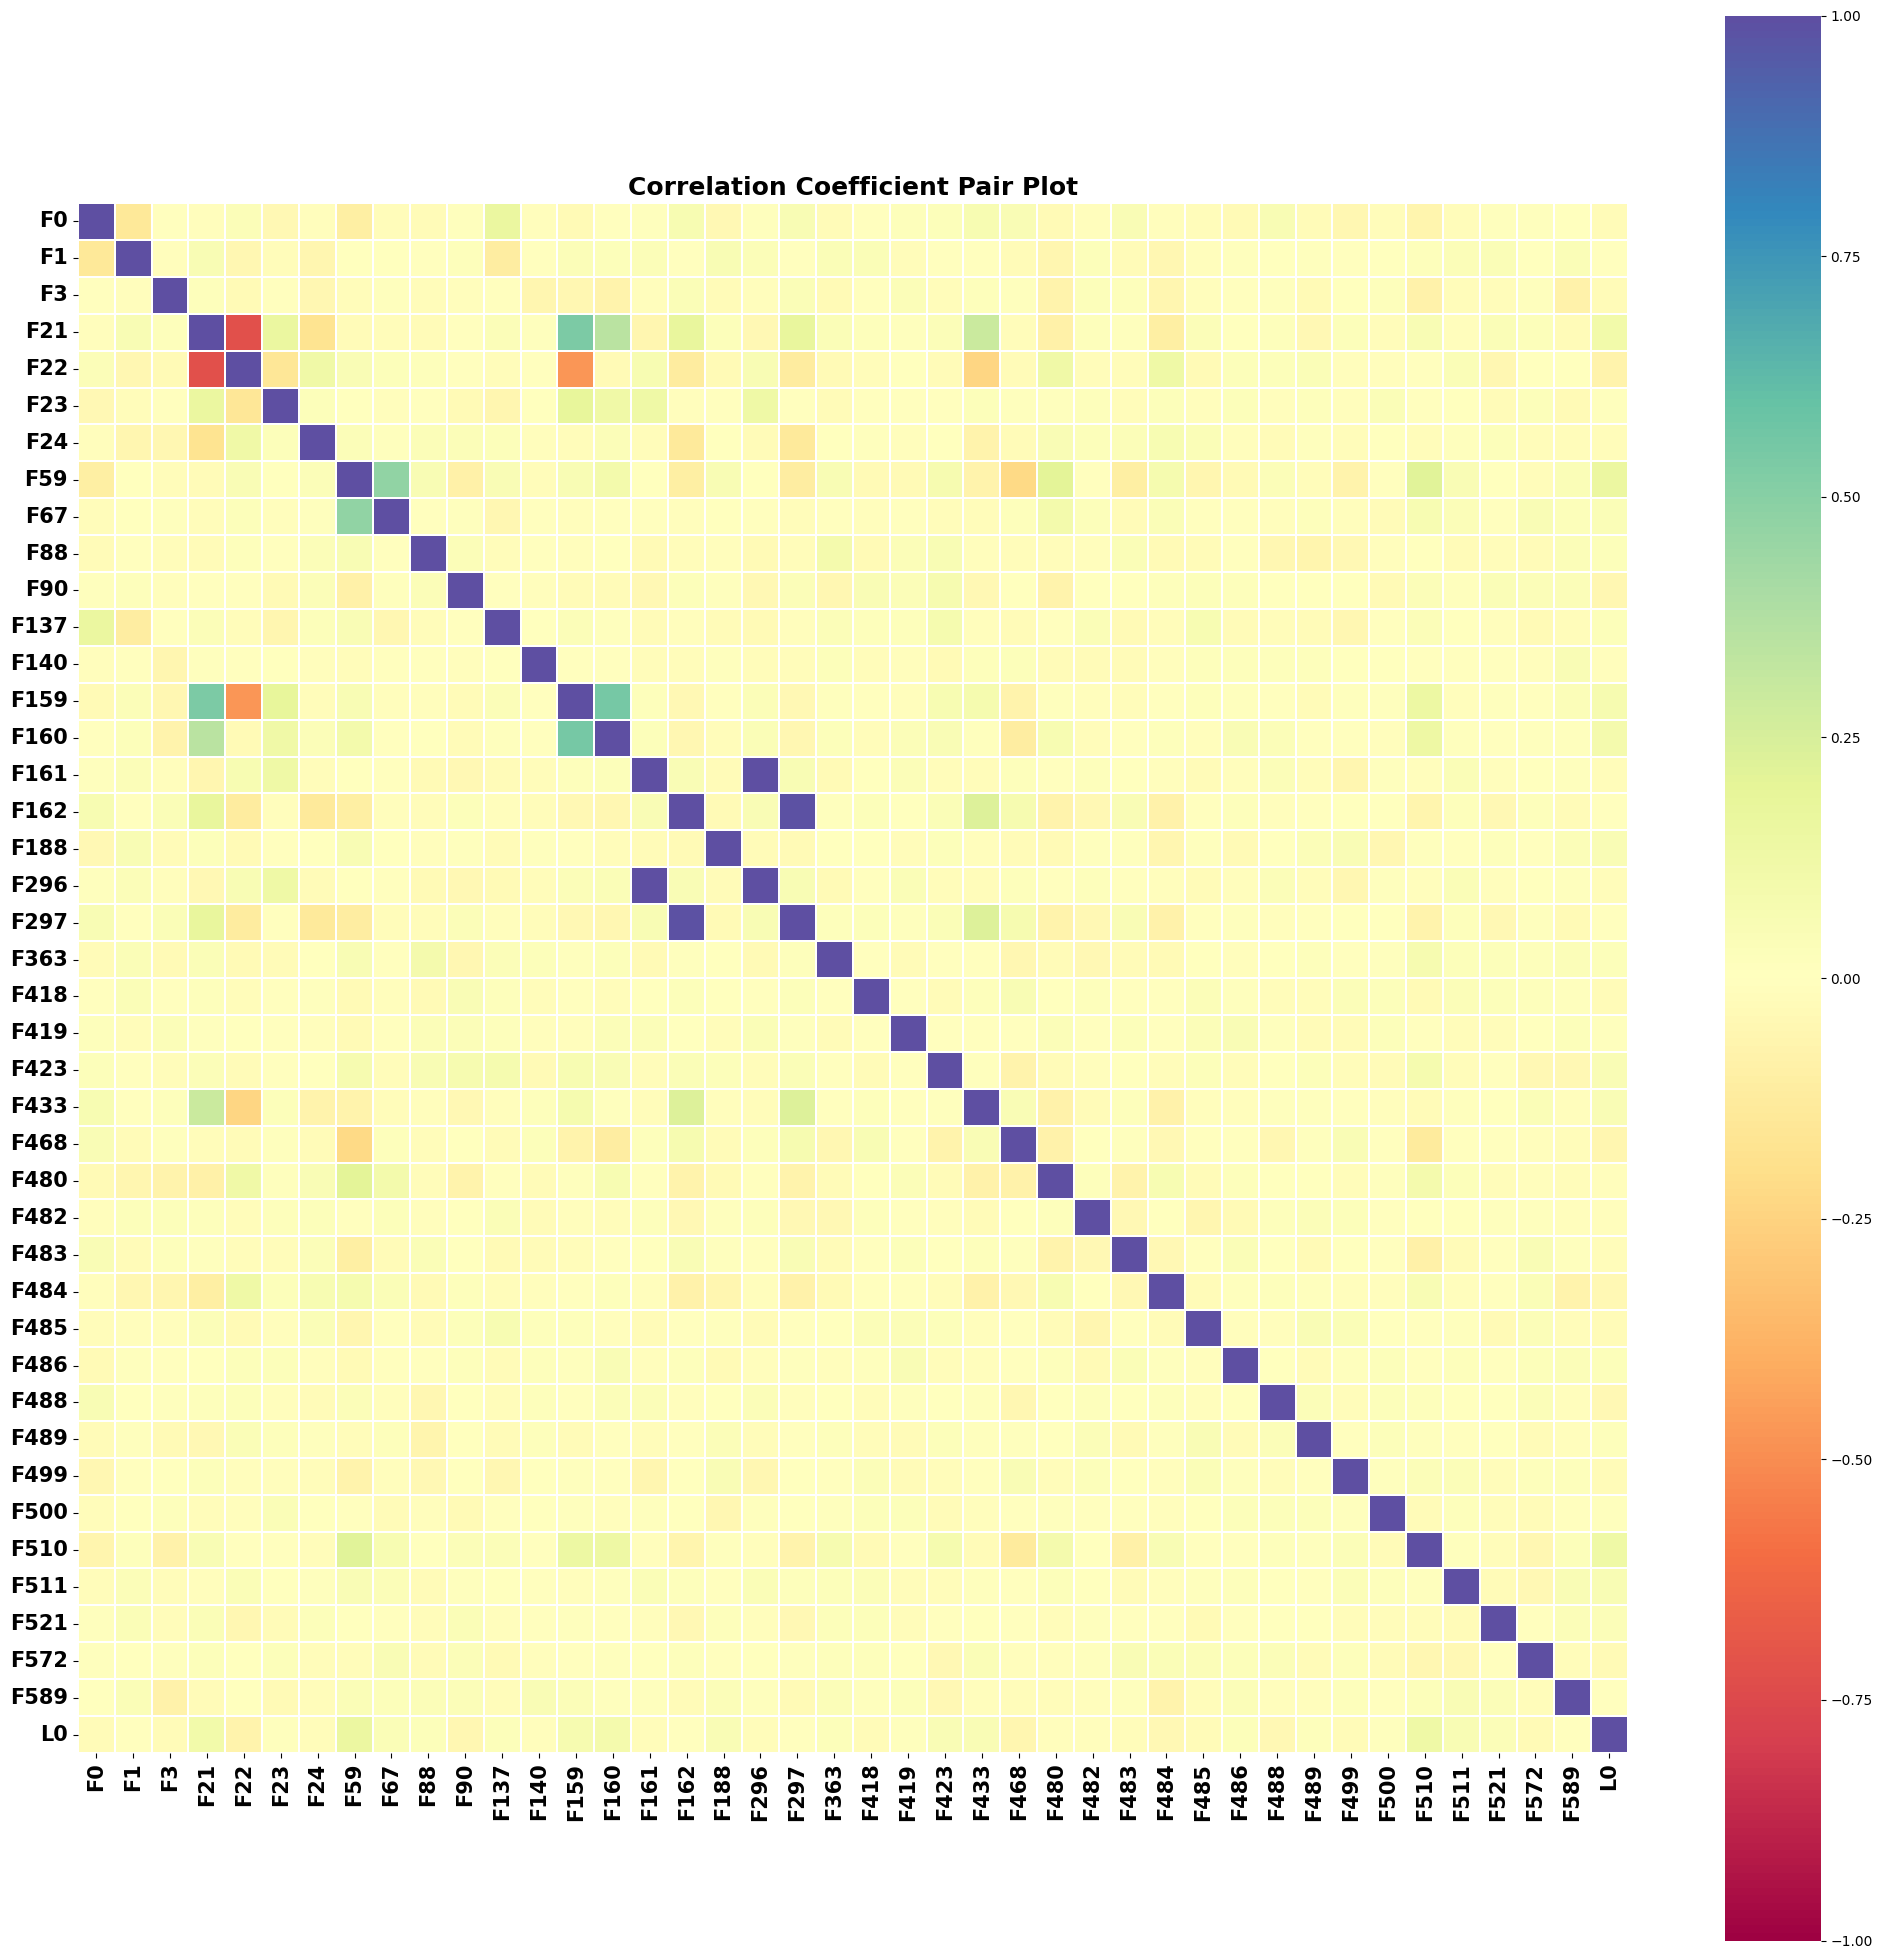

In [20]:
# Making correlation coefficients pair plot of all feature in order to identify degenrate features
plt.figure(figsize=(25,25))
df1 = pd.concat([X,y],axis=1, ignore_index=False)
ax = plt.axes()
corr = df1.corr()
sns.heatmap(corr, vmax=1,vmin=-1, square=True, annot=False, cmap='Spectral',linecolor="white", linewidths=0.01, ax=ax)
plt.xticks(rotation=90,fontweight="bold", size=15)
plt.yticks(rotation=0,fontweight="bold", size=15)
plt.title('Correlation Coefficient Pair Plot', fontweight="bold", size=18)
plt.savefig('pcp.png')
plt.show()

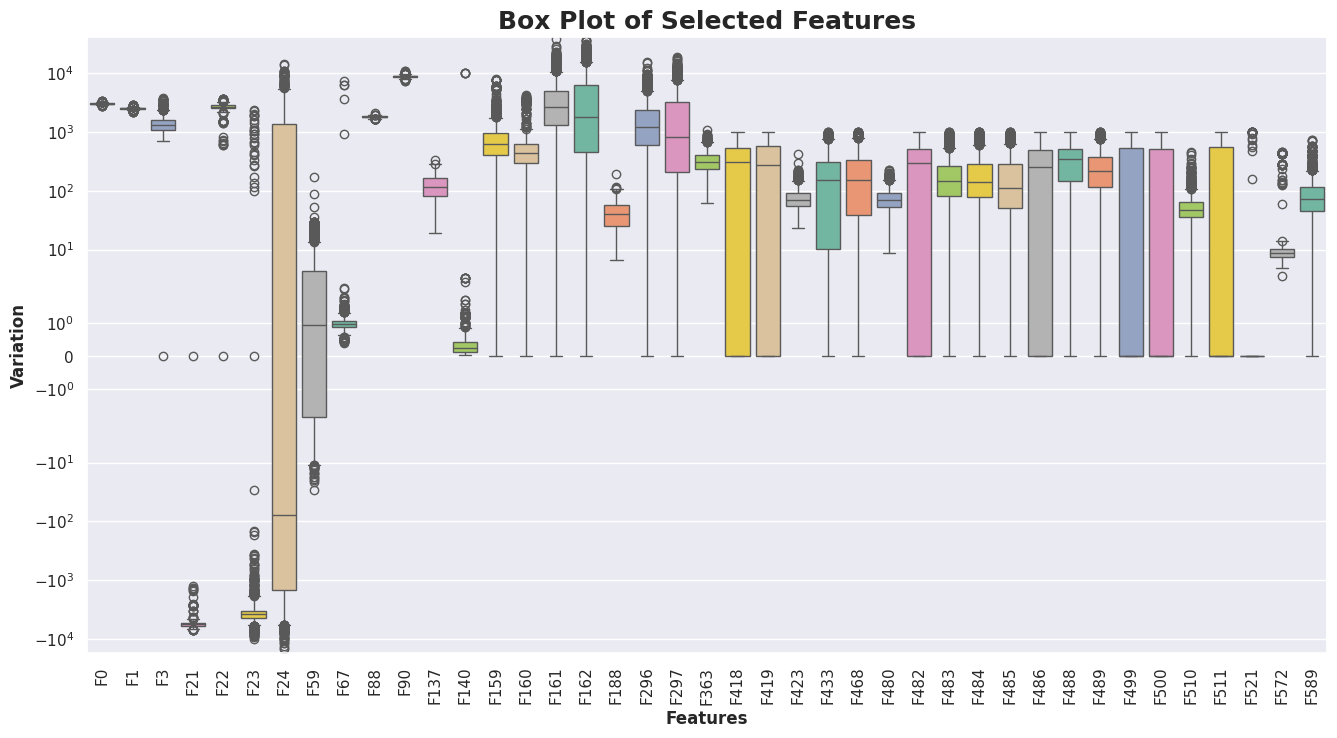

In [21]:
# Making box plot to explore features variations and outliers
plt.figure(figsize=(16,8))
sns.set()
sns.boxplot(data=X, orient="v", palette="Set2")
plt.xlabel('Features',fontweight="bold", size=12)
plt.ylabel('Variation',fontweight="bold", size=12)
plt.title('Box Plot of Selected Features', fontweight="bold", size=18)
plt.yscale('symlog')
plt.xticks(rotation=90)
plt.savefig('BoxPlot.png');plt.show()

<ipython-input-22-aae98b32481b>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


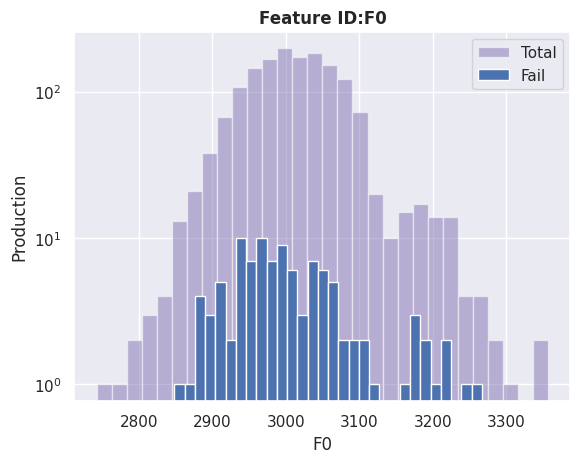

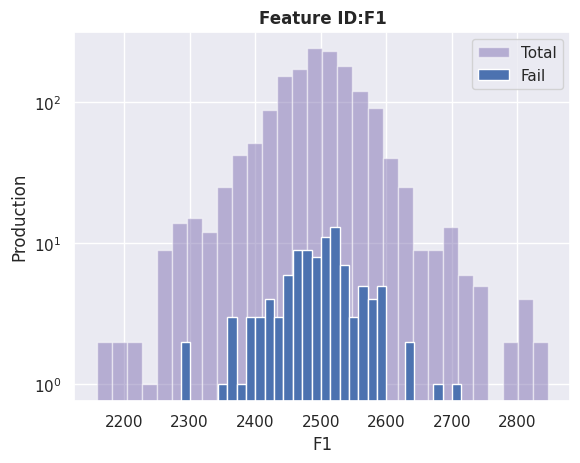

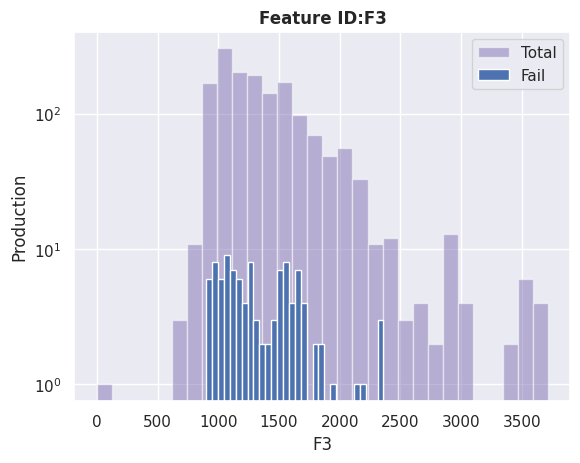

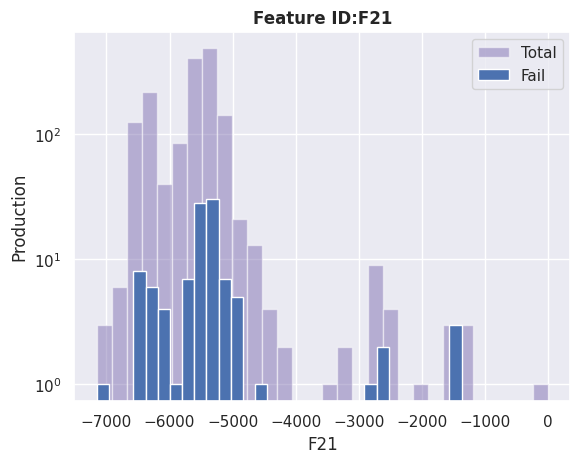

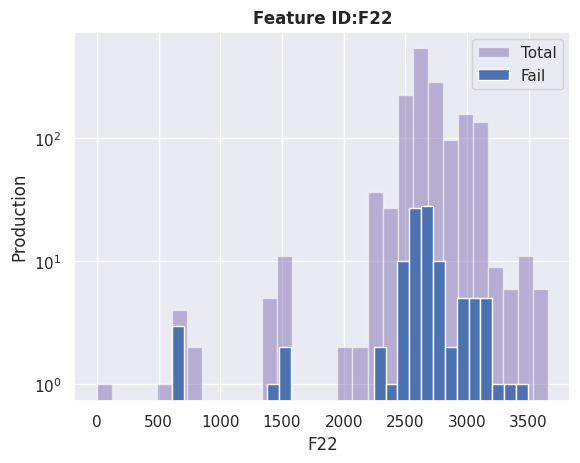

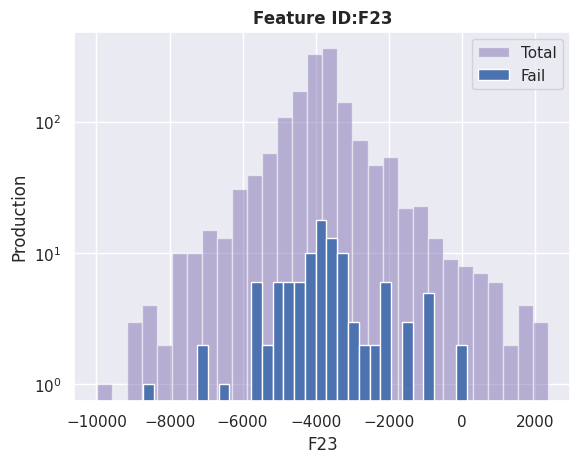

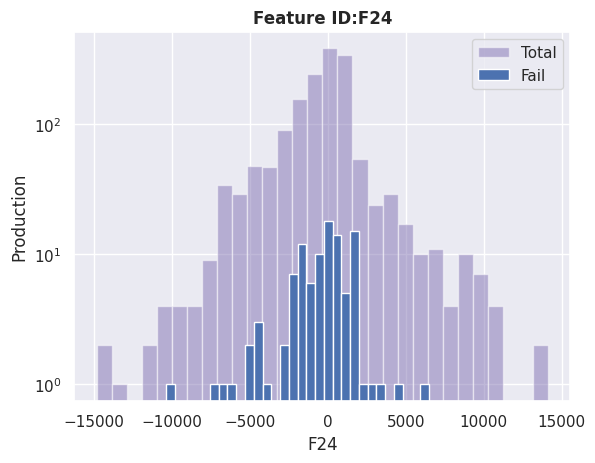

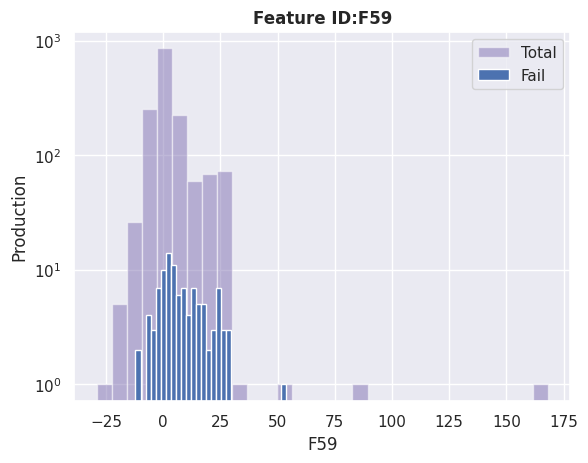

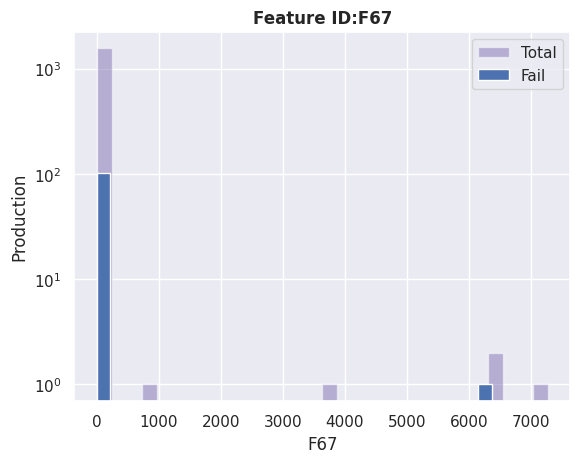

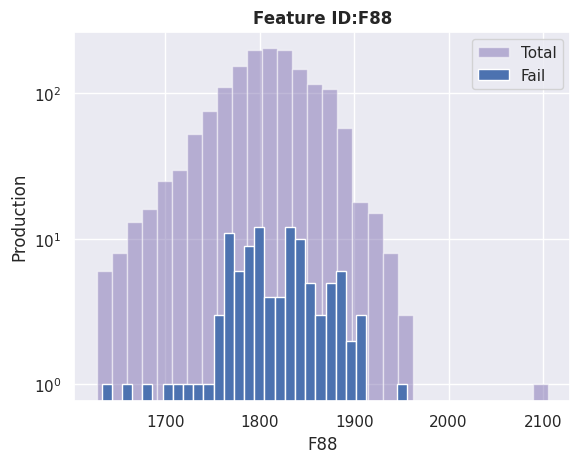

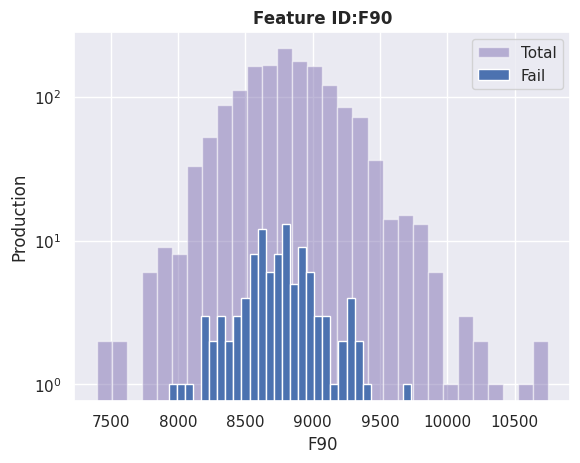

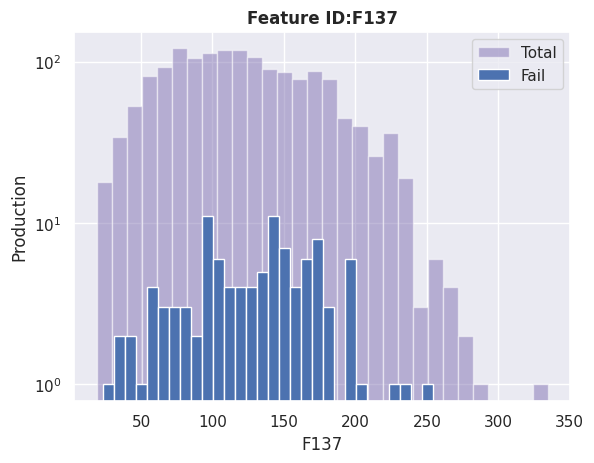

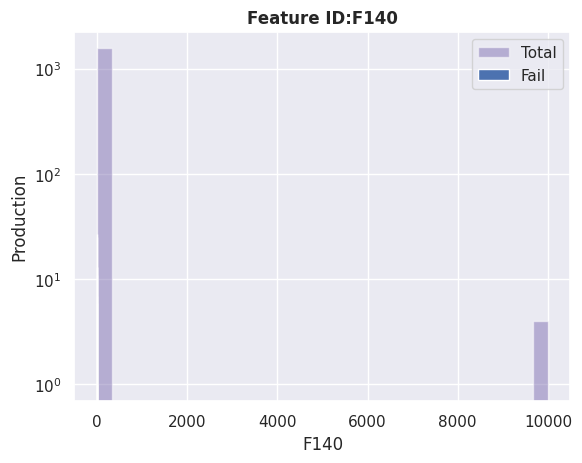

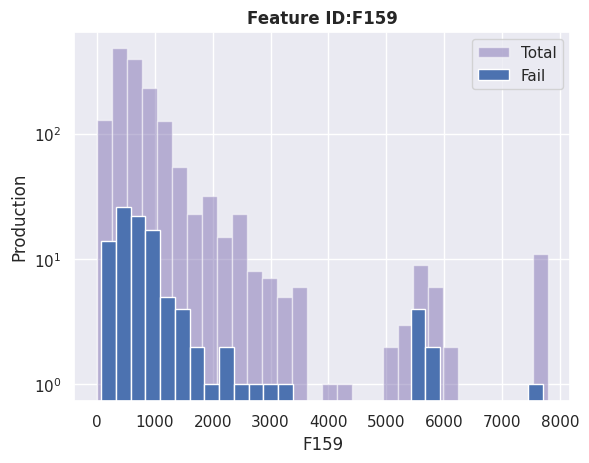

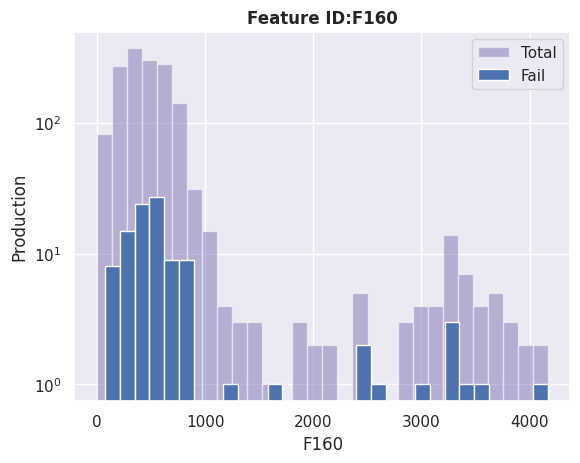

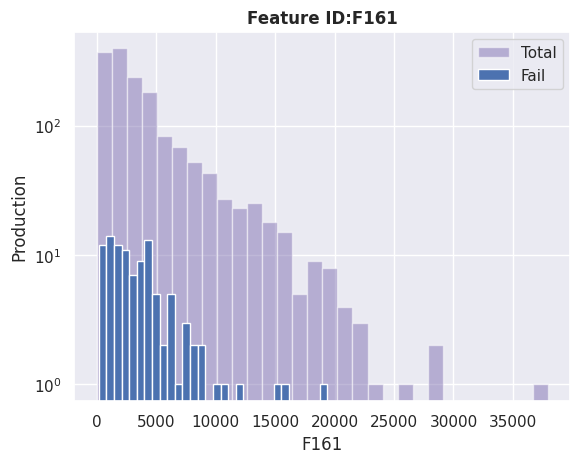

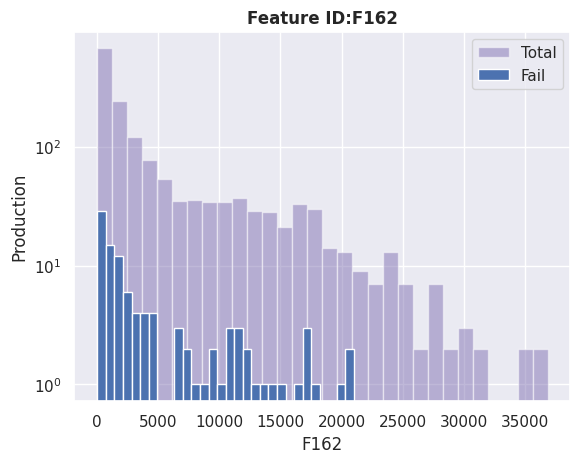

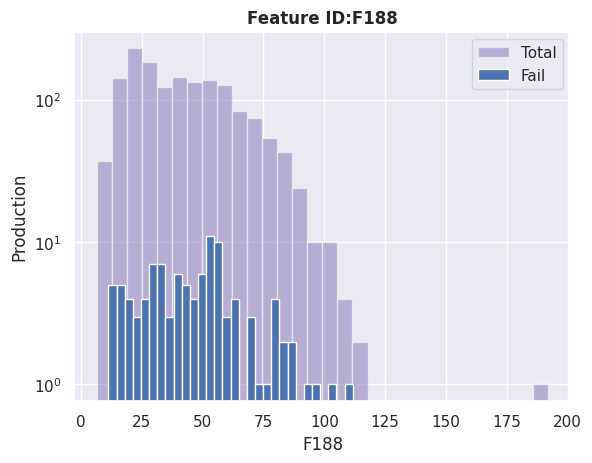

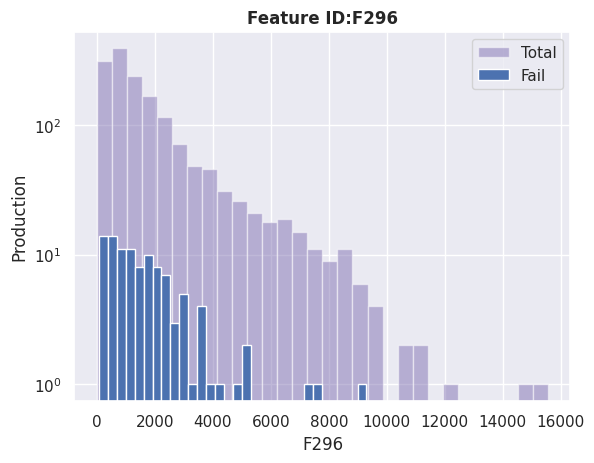

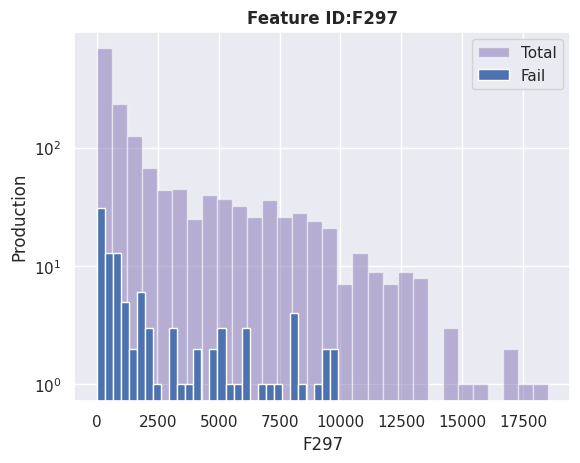

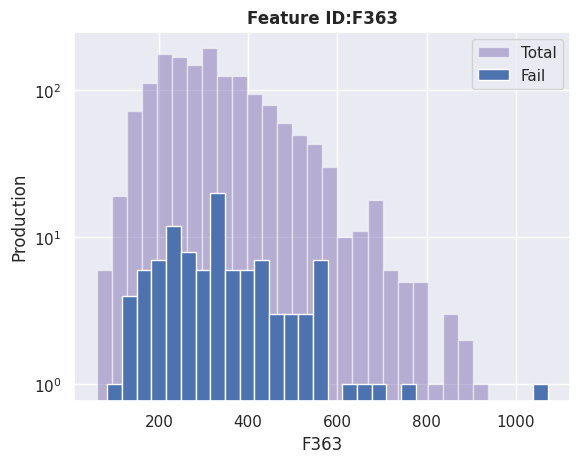

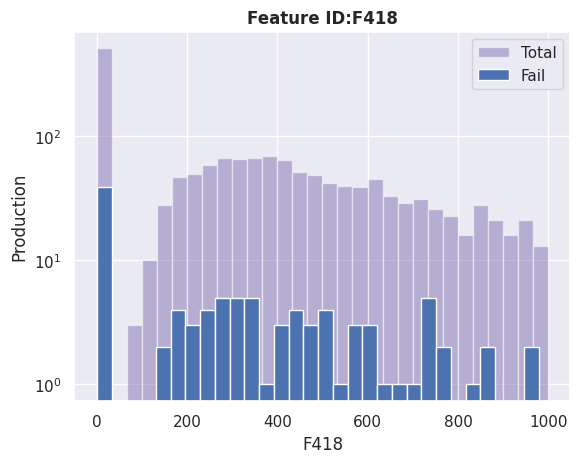

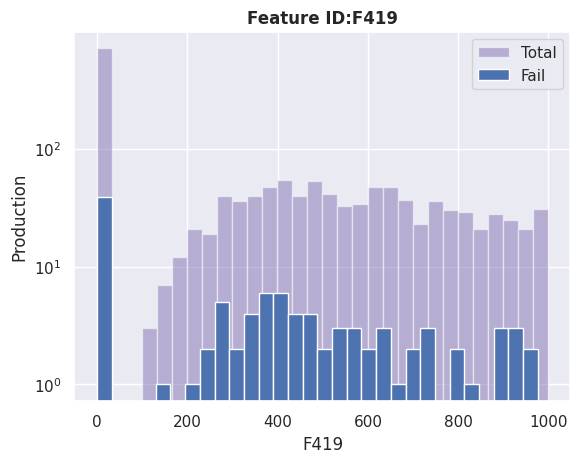

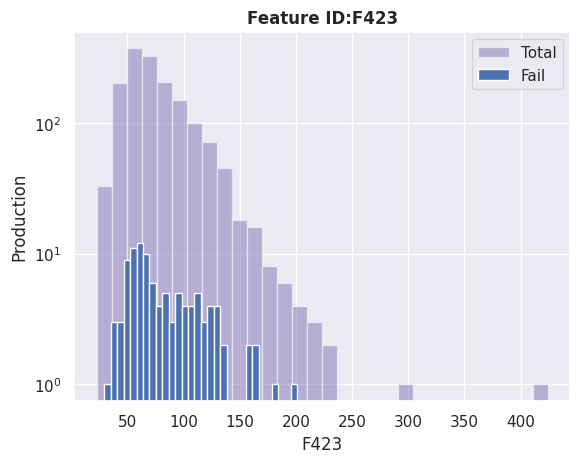

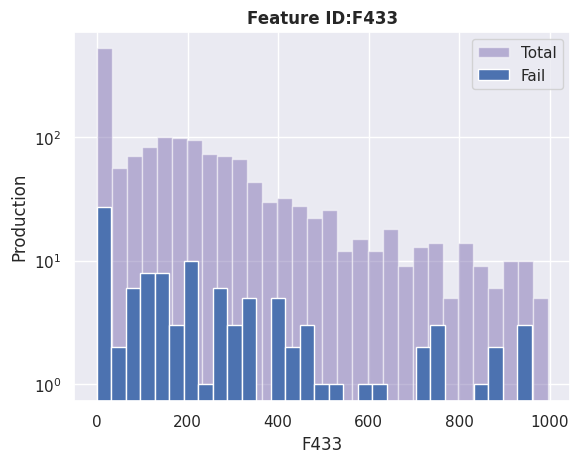

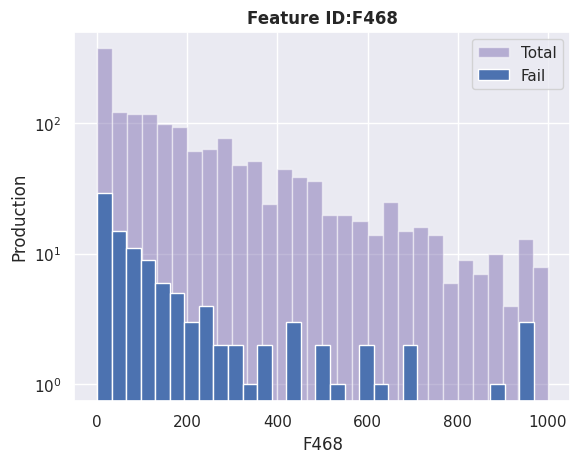

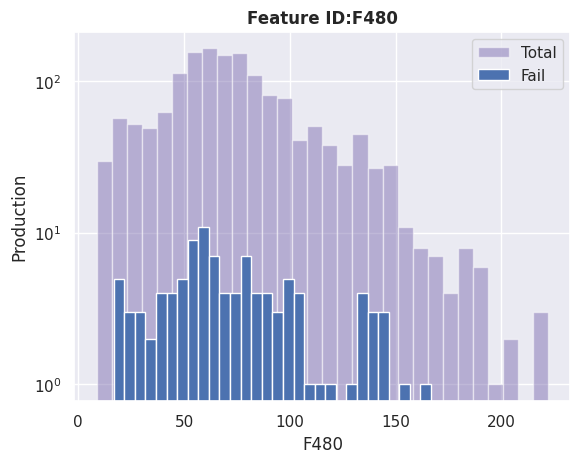

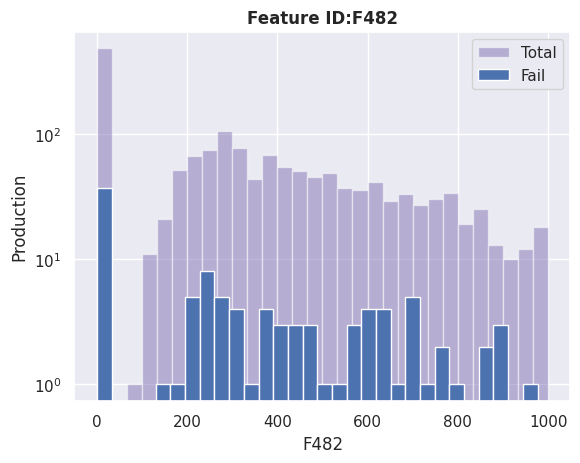

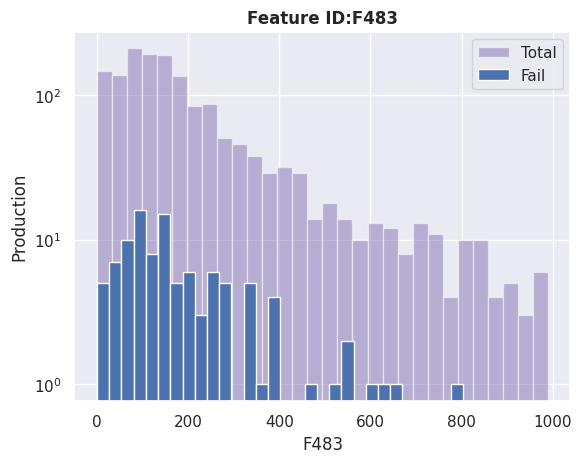

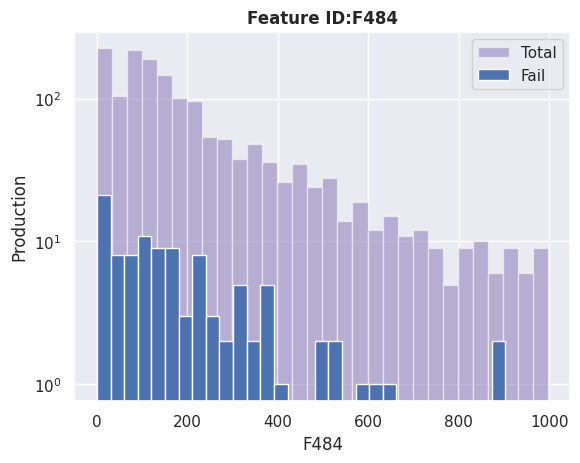

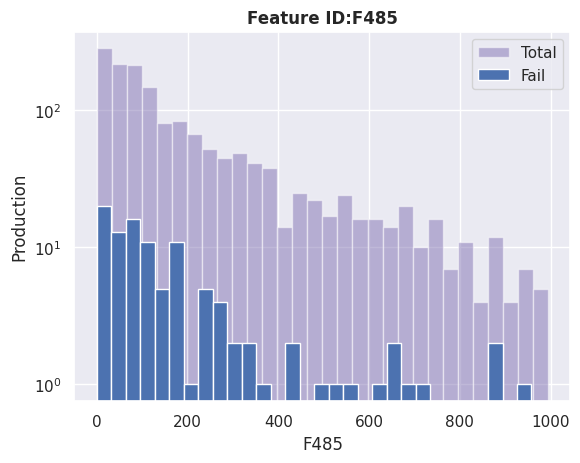

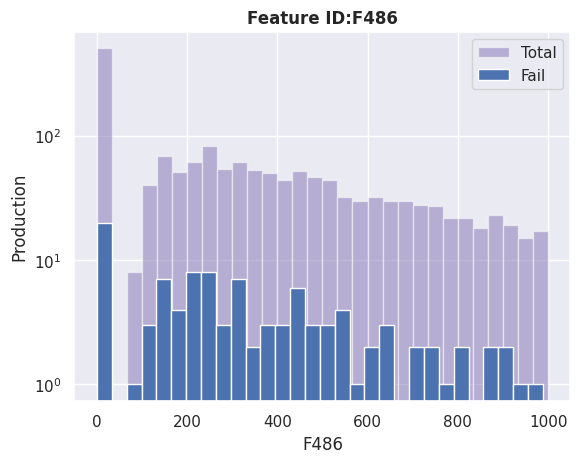

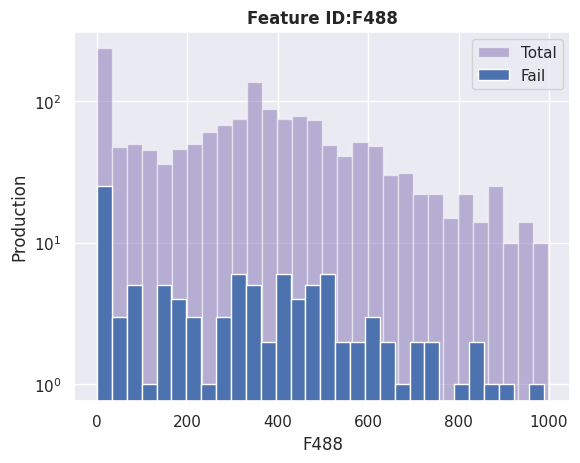

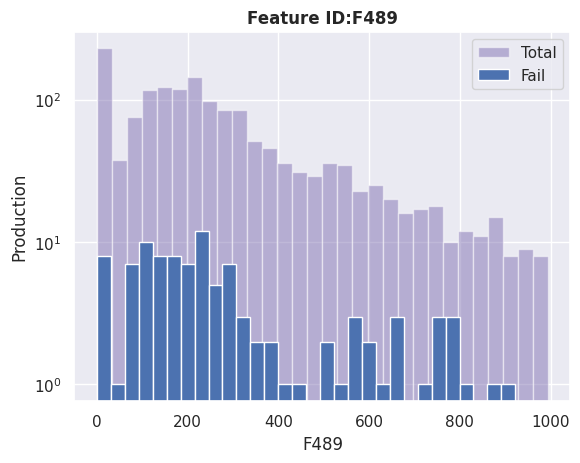

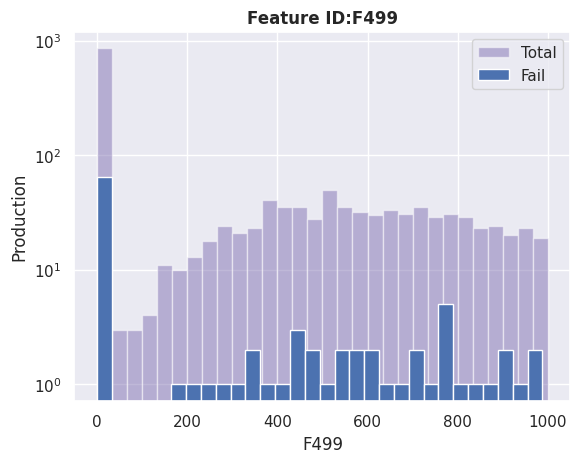

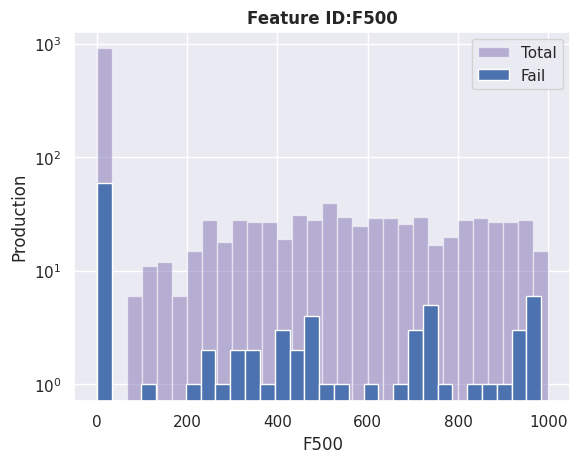

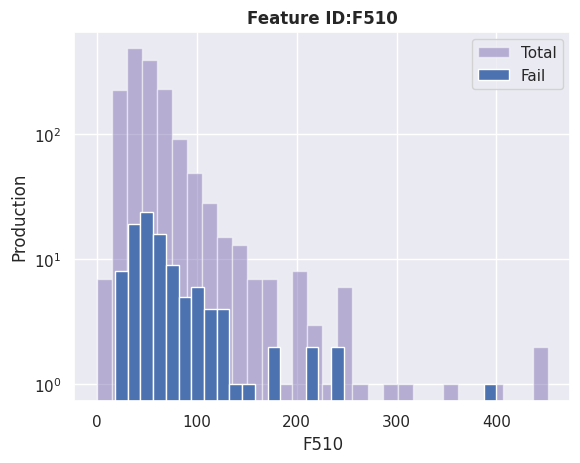

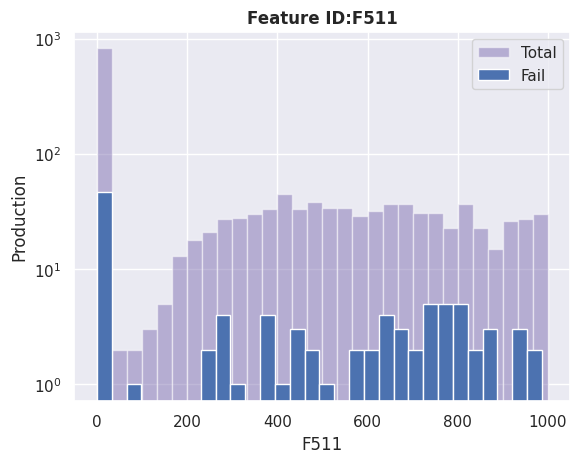

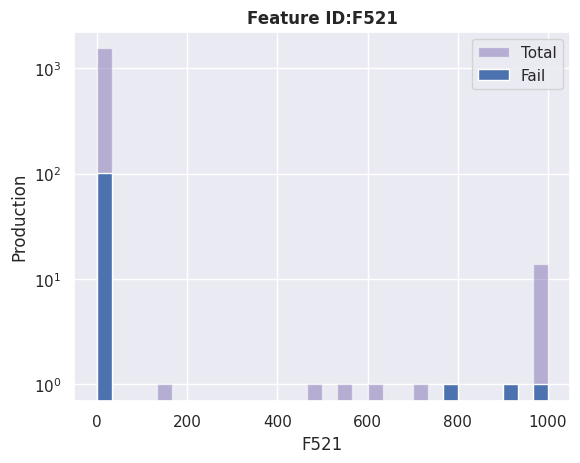

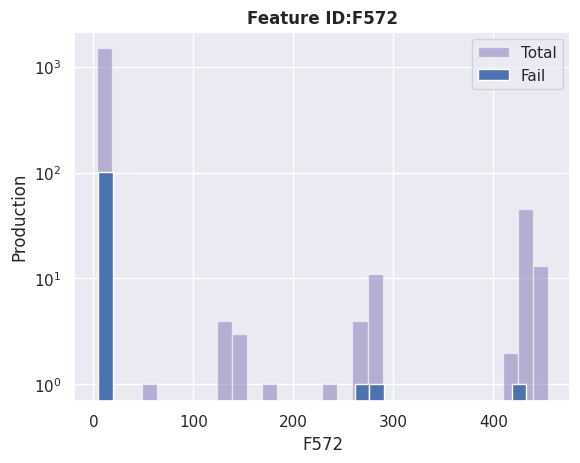

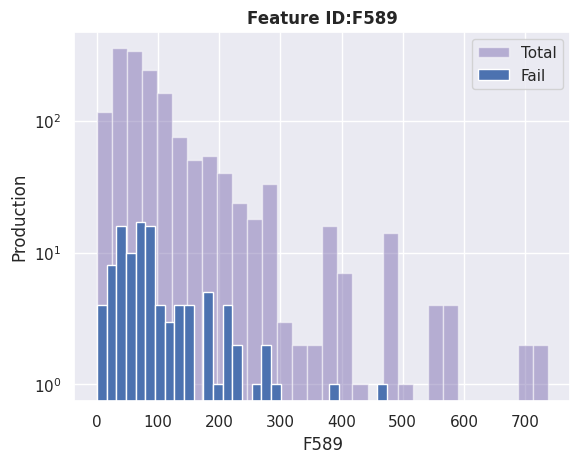

In [22]:
# Plotting total products against failed product in histogram format
bins = 30
for feature in feature_list:
    tf = feature
    plt.figure()
    plt.hist(df1[tf], bins = bins, color='m',label = 'Total',alpha=0.5)
    plt.hist(df1[tf][df1['L0'] == 1], bins = bins, color='b',label = 'Fail')

    plt.xlabel(tf);plt.ylabel('Production')
    plt.title('Feature ID:'+tf,fontweight="bold", size=12)
    plt.yscale('log')

    plt.legend();plt.savefig(tf+'.png');
    #plt.close()



# 4.Statistical Analysis & Hypothesis Testing

In [23]:
num_replica = 3000
bs_replica = np.empty(num_replica)
ht_feature = 'F484'
threshold = 680

lower_range = df1[(df1[ht_feature]>threshold) ]
higher_range = df1[(df1[ht_feature]<=threshold)]

lower_range_ratio = len(lower_range[lower_range['L0'] == 1])/len(lower_range)
higher_range_ratio = len(higher_range[higher_range['L0'] == 1])/len(higher_range)
ratio_diff = higher_range_ratio-lower_range_ratio

print('Higher fail ratio:',"%.3f" % higher_range_ratio)
print('Lower fail ration:',"%.3f" % lower_range_ratio)
print('Ratio difference:', "%.3f" % ratio_diff)


Higher fail ratio: 0.069
Lower fail ration: 0.025
Ratio difference: 0.044


In [24]:
# Bootstrapping
for i in range(num_replica):
    lr_bs = lower_range.sample(frac=1,replace=True)
    hr_bs = higher_range.sample(frac=1,replace=True)

    lr_bs_r = len(lr_bs[lr_bs['L0'] == 1])/len(lr_bs)
    hr_bs_r = len(hr_bs[hr_bs['L0'] == 1])/len(hr_bs)
    ratio_diff_bs = hr_bs_r - lr_bs_r
    bs_replica[i] = ratio_diff_bs


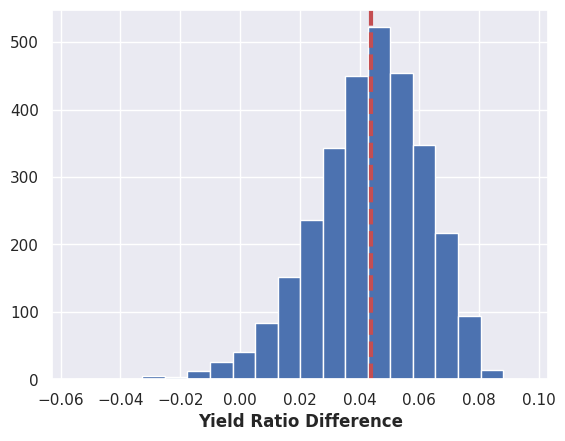

In [25]:
# Histogram plot
plt.hist(bs_replica, bins=20)
plt.axvline(ratio_diff, color='r', linestyle='dashed', linewidth=3)
plt.xlabel('Yield Ratio Difference',fontweight="bold", size=12)
plt.savefig('Hypothesis.png');
plt.show()

In [26]:
# Calculating P-value
print('Mean ratio decrease:',"%.3f" % np.mean(bs_replica))
print('95% Confidence interval:', (np.percentile(bs_replica,[2.5,97.5])))
print('P-value:', np.sum(bs_replica > (ratio_diff))/num_replica)

Mean ratio decrease: 0.044
95% Confidence interval: [0.00354751 0.07469717]
P-value: 0.521


# 5.Time Series Analysis

In [27]:
# Preparing data for time series analysis
# Concatinating two separate files
df2 = pd.concat([features,label],axis=1, ignore_index=False)

# Converting to time series format
df2.date = pd.to_datetime(df2.date)
df2.set_index('date', inplace=True)

<ipython-input-27-7290a43f5135>:6: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2.date = pd.to_datetime(df2.date)


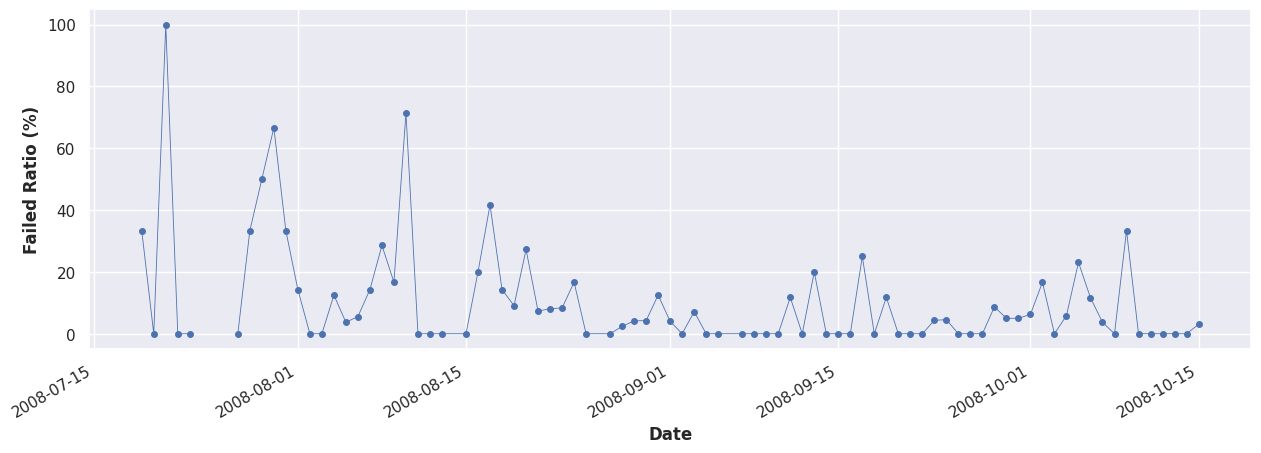

In [28]:
# Resampling yield data based on daily information
failed_product = df2.L0[df2['L0']==1].resample('D').count()
total_product = df2.L0[df2['L0']==-1].resample('D').count()

failed_ratio = failed_product * 100 / total_product
failed_ratio = failed_ratio.dropna()

# Visualizaion of daily production failed ratio
sns.set()

failed_ratio.plot(style='bo-',markersize=4, linewidth = 0.6, figsize=(15,5))

plt.xlabel('Date', fontweight="bold", size=12)
plt.ylabel('Failed Ratio (%)', fontweight="bold", size=12)
plt.grid(True);plt.savefig('100Days.png')
plt.show()

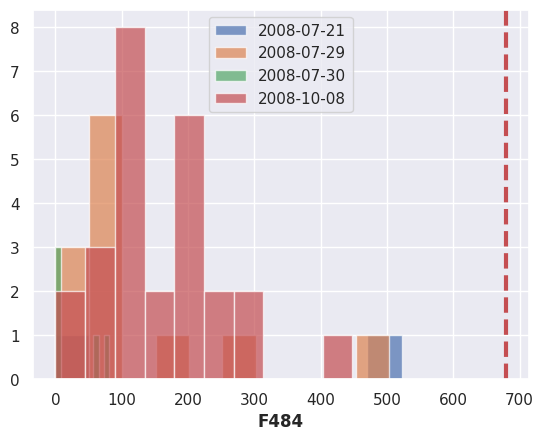

In [29]:
# Indexing dates with more than 50% failed ratio
date_index = failed_ratio[failed_ratio >= 50]

# Plotting F484 for date_index
df2['F484'].loc['2008-07-21'].hist(alpha=0.7, label = '2008-07-21')
df2['F484'].loc['2008-07-29'].hist(alpha=0.7, label = '2008-07-29')
df2['F484'].loc['2008-07-30'].hist(alpha=0.7, label = '2008-07-30')
df2['F484'].loc['2008-10-08'].hist(alpha=0.7, label = '2008-10-08')
plt.axvline(680, color='r', linestyle='dashed', linewidth=3) # Thresold in hypothesis testing (Previouse section)
plt.xlabel('F484', fontweight="bold", size=12)
plt.legend()
plt.savefig('F484_Worst.png')
plt.show()


# 6.Data Preparation for model training

In [30]:
# Claculating default Ratio
passed = len(df[df['L0']==0])
failed = len(df[df['L0']==1])
ratio = float(failed/(passed+failed))
print('Number of passed sample:', passed)
print('Number of failed sample:', failed)
print('Default Ratio (failed/total) :', "%.3f" % ratio)


Number of passed sample: 1463
Number of failed sample: 104
Default Ratio (failed/total) : 0.066


In [31]:
# Splitting data to train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)
X_test = X_test.to_numpy() # Coverting dataframe to matrix for compatibility purpose

In [32]:
# Under-sampling of overer-represented calss (pass)
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_us, y_us = rus.fit_resample(X_train, y_train)

In [33]:
print('Size of training data-set:', X_train.shape)
print('Size of under sampling data_set:', X_us.shape)

Size of training data-set: (1096, 41)
Size of under sampling data_set: (146, 41)


In [34]:
# Over-sampling of under-represented calss (fail)
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_os, y_os = ros.fit_resample(X_train, y_train)
print('Size of overer sampling data_set:', X_os.shape)

Size of overer sampling data_set: (2046, 41)


# 7.ML Model Development

In [35]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report
from matplotlib.pylab import rcParams
from sklearn.metrics import accuracy_score, roc_auc_score
import warnings

warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 12, 4


In [36]:
# XGB Model

import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import pandas as pd

def xgb_model(alg, X_matrix, y_vector, test_matrix, test_vector, useTrainCV=True, useTestSet=False, cv_folds=5, early_stopping_rounds=50):

    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_matrix, label=y_vector)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])

    # Fit the algorithm on the data
    alg.fit(X_matrix, y_vector)  # Removed eval_metric

    # Predict training set
    dtrain_predictions = alg.predict(X_matrix)
    dtrain_predprob = alg.predict_proba(X_matrix)[:, 1]

    # Print model report
    print("\nModel Report on Training Set")
    print("Accuracy : %.4g" % metrics.accuracy_score(y_vector, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(y_vector, dtrain_predprob))

    # Determine the false positive and true positive rates
    fpr_train, tpr_train, _ = roc_curve(y_vector, dtrain_predprob)

    # Plot of a ROC curve for a specific class
    plt.figure()
    plt.plot(fpr_train, tpr_train, label='Training ROC curve (area = %0.2f)' % metrics.roc_auc_score(y_vector, dtrain_predprob))

    if useTestSet:
        # Predict test set
        dtest_predictions = alg.predict(test_matrix)
        dtest_predprob = alg.predict_proba(test_matrix)[:, 1]

        # Print model report
        print("\nModel Report on Test Set")
        print("Accuracy : %.4g" % metrics.accuracy_score(test_vector, dtest_predictions))
        print("AUC Score (Test): %f" % metrics.roc_auc_score(test_vector, dtest_predprob))

        # Determine the false positive and true positive rates
        fpr_test, tpr_test, _ = roc_curve(test_vector, dtest_predprob)

        # Plot of a ROC curve for a specific class
        plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % metrics.roc_auc_score(test_vector, dtest_predprob))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.savefig('ROC.png')
    plt.show()

    # Calculate feature importance
    feat_imp = pd.Series(alg.feature_importances_).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    plt.savefig('Feature_Importance.png')
    plt.show()


In [37]:
xgb1 = XGBClassifier(
    learning_rate=0.1,
    n_estimators=200,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0,
    reg_lambda=1,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27,
    eval_metric='logloss'  # Example if needed, else remove it
)

# Now fit the model
xgb1.fit(X_train, y_train)

# Making predictions and evaluating
y_pred = xgb1.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.99      0.96       440
           1       0.00      0.00      0.00        31

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471



# 8. Model Optimization

In [38]:
# Tunning max_depth & min_child_weight (Part I)


param_test1 = {
    'max_depth': np.arange(3, 10, 2),
    'min_child_weight': np.arange(1, 10, 2)
}

gsearch1 = GridSearchCV(
    estimator=XGBClassifier(
        learning_rate=0.1,
        n_estimators=200,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0,
        reg_lambda=1,
        objective='binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27
    ),
    param_grid=param_test1,
    scoring='roc_auc',
    n_jobs=4,
    cv=5  # removed the 'iid' argument
)

gsearch1.fit(X_train, y_train)
gsearch1.best_params_, gsearch1.best_score_


({'max_depth': 5, 'min_child_weight': 7}, 0.6929216369474619)

In [39]:
gsearch1.cv_results_  # Access cross-validation results
gsearch1.best_params_  # Get the best parameters
gsearch1.best_score_  # Get the best score


0.6929216369474619

In [40]:
# Tunning max_depth & min_child_weight (Part II)

# Define the parameter grid
param_test2 = {
    'max_depth': [6, 7, 8]
}

# Set up the GridSearchCV without 'iid' and with 'cv_results_'
gsearch2 = GridSearchCV(
    estimator=XGBClassifier(
        learning_rate=0.1,
        n_estimators=200,
        max_depth=7,
        min_child_weight=9,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0,
        reg_lambda=1,
        objective='binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27
    ),
    param_grid=param_test2,
    scoring='roc_auc',
    n_jobs=4,
    cv=5  # removed 'iid'
)

# Fit the model
gsearch2.fit(X_train, y_train)

# Extract the best parameters and score
best_params = gsearch2.best_params_
best_score = gsearch2.best_score_

# If you want to inspect the cross-validation results
cv_results = gsearch2.cv_results_

# Output the best params and score
best_params, best_score


({'max_depth': 6}, 0.6824194393204437)

In [41]:
# Tunning max_depth & min_child_weight (Part III)


# Define the parameter grid for min_child_weight
param_test3 = {
    'min_child_weight': [8, 9, 10, 11, 12, 13, 14, 15, 16]
}

# Set up the GridSearchCV without 'iid' and with updated methods
gsearch3 = GridSearchCV(
    estimator=XGBClassifier(
        learning_rate=0.1,
        n_estimators=200,
        max_depth=6,
        min_child_weight=9,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27
    ),
    param_grid=param_test3,
    scoring='roc_auc',
    n_jobs=4,
    cv=5  # Removed 'iid'
)

# Fit the model
gsearch3.fit(X_train, y_train)

# Extract the best parameters and score
best_params = gsearch3.best_params_
best_score = gsearch3.best_score_

# If you want to inspect the cross-validation results
cv_results = gsearch3.cv_results_

# Output the best params and score
best_params, best_score


({'min_child_weight': 15}, 0.704878823073945)

In [42]:
# Tunning gamma


# Define the parameter grid for gamma
param_test4 = {
    'gamma': [i/10.0 for i in range(0, 8)]
}

# Set up the GridSearchCV without 'iid' and using cv_results_
gsearch4 = GridSearchCV(
    estimator=XGBClassifier(
        learning_rate=0.1,
        n_estimators=200,
        max_depth=6,
        min_child_weight=14,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0,
        reg_lambda=1,
        objective='binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27
    ),
    param_grid=param_test4,
    scoring='roc_auc',
    n_jobs=4,
    cv=5  # Removed 'iid'
)

# Fit the model
gsearch4.fit(X_train, y_train)

# Extract the best parameters and score
best_params = gsearch4.best_params_
best_score = gsearch4.best_score_

# If you want to inspect the cross-validation results
cv_results = gsearch4.cv_results_

# Output the best params and score
best_params, best_score


({'gamma': 0.4}, 0.707513470428822)

In [43]:
# Tunning subsample & colsample_bytree (Part I)

# Define the parameter grid for subsample and colsample_bytree
param_test5 = {
    'subsample': [i/10.0 for i in range(6, 10)],
    'colsample_bytree': [i/10.0 for i in range(6, 10)]
}

# Set up the GridSearchCV without 'iid' and using cv_results_
gsearch5 = GridSearchCV(
    estimator=XGBClassifier(
        learning_rate=0.1,
        n_estimators=200,
        max_depth=6,
        min_child_weight=14,
        gamma=0.4,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0,
        reg_lambda=1,
        objective='binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27
    ),
    param_grid=param_test5,
    scoring='roc_auc',
    n_jobs=4,
    cv=5  # Removed 'iid'
)

# Fit the model
gsearch5.fit(X_train, y_train)

# Extract the best parameters and score
best_params = gsearch5.best_params_
best_score = gsearch5.best_score_

# If you want to inspect the cross-validation results
cv_results = gsearch5.cv_results_

# Output the best params and score
best_params, best_score



({'colsample_bytree': 0.7, 'subsample': 0.8}, 0.7108958575300038)

In [44]:
# Tunning subsample & colsample_bytree (Part II)



# Define the parameter grid for subsample and colsample_bytree
param_test6 = {
    'subsample': [i/100.0 for i in range(70, 95, 5)],
    'colsample_bytree': [i/100.0 for i in range(70, 95, 5)]
}

# Set up the GridSearchCV without 'iid' and using cv_results_
gsearch6 = GridSearchCV(
    estimator=XGBClassifier(
        learning_rate=0.1,
        n_estimators=200,
        max_depth=6,
        min_child_weight=14,
        gamma=0.4,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0,
        reg_lambda=1,
        objective='binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27
    ),
    param_grid=param_test6,
    scoring='roc_auc',
    n_jobs=4,
    cv=5  # Removed 'iid'
)

# Fit the model
gsearch6.fit(X_train, y_train)

# Extract the best parameters and score
best_params = gsearch6.best_params_
best_score = gsearch6.best_score_

# If you want to inspect the cross-validation results
cv_results = gsearch6.cv_results_

# Output the best params and score
best_params, best_score


({'colsample_bytree': 0.7, 'subsample': 0.75}, 0.7135141080822572)

In [45]:
# Tunning reg_alpha

param_test7 = {
    'reg_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

# Set up the GridSearchCV without 'iid' and using cv_results_
gsearch7 = GridSearchCV(
    estimator=XGBClassifier(
        learning_rate=0.1,
        n_estimators=200,
        max_depth=6,
        min_child_weight=14,
        gamma=0.4,
        subsample=0.8,
        colsample_bytree=0.75,
        reg_alpha=0,
        reg_lambda=1,
        objective='binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27
    ),
    param_grid=param_test7,
    scoring='roc_auc',
    n_jobs=4,
    cv=5  # Removed 'iid'
)

# Fit the model
gsearch7.fit(X_train, y_train)

# Extract the best parameters and score
best_params = gsearch7.best_params_
best_score = gsearch7.best_score_

# If you want to inspect the cross-validation results
cv_results = gsearch7.cv_results_

# Output the best params and score
best_params, best_score



({'reg_alpha': 0.5}, 0.7148232105850469)

In [46]:
X_train = X_train.to_numpy()

In [47]:
# Final XGBClassifier model
xgb2 = XGBClassifier(
    learning_rate=0.1,
    n_estimators=200,
    max_depth=6,
    min_child_weight=14,
    gamma=0.4,
    subsample=0.8,
    colsample_bytree=0.75,
    reg_alpha=0.5,
    reg_lambda=1,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27
)

In [48]:
# Train the model
xgb2.fit(X_train, y_train)

# Make predictions (on test set if 'useTestSet = True')
y_pred = xgb2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {round(accuracy,2)*100}%")
print(f"ROC AUC: {roc_auc}")

Accuracy: 93.0%
ROC AUC: 0.4954545454545455



Model Report on Training Set
Accuracy : 0.9343
AUC Score (Train): 0.913202

Model Report on Test Set
Accuracy : 0.9321
AUC Score (Test): 0.743035


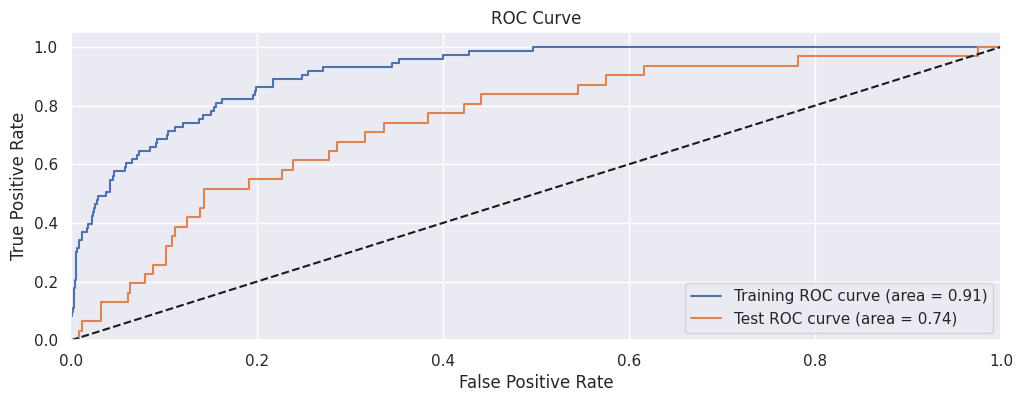

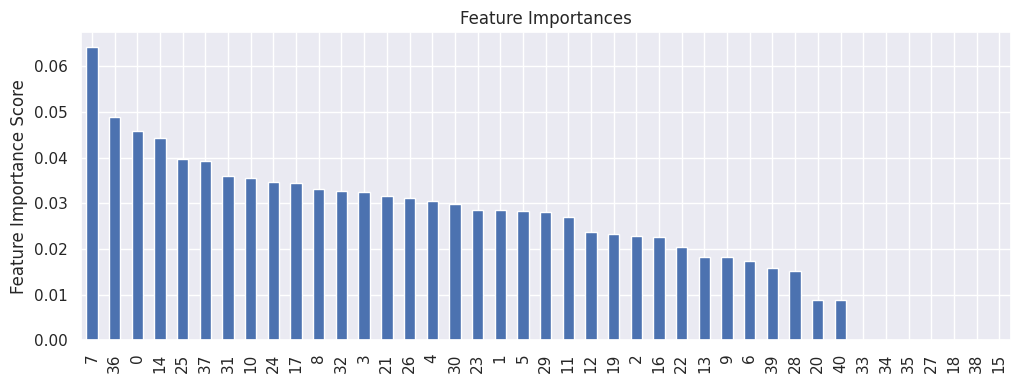

In [49]:
xgb_model(xgb2, X_train, y_train, X_test, y_test, useTestSet = True)